<a href="https://colab.research.google.com/github/knorth55/chainercv-colab/blob/master/chainercv_demos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ChainerCV Demos

## Installation

In [0]:
%matplotlib inline

In [0]:
!curl https://colab.chainer.org/install | sh -

In [0]:
!pip install chainercv

In [0]:
import chainer
import chainercv
chainer.print_runtime_info()
print('Chainercv Version: {}'.format(chainercv.__version__))

## Object Detection

### Setup

In [0]:
! wget https://cloud.githubusercontent.com/assets/2062128/26187667/9cb236da-3bd5-11e7-8bcf-7dbd4302e2dc.jpg -O demo.jpg

In [0]:
import matplotlib.pyplot as plt

import chainer

from chainercv.datasets import voc_bbox_label_names
from chainercv import utils
from chainercv.visualizations import vis_bbox

###Faster RCNN

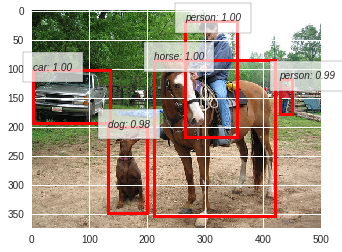

In [57]:
from chainercv.links import FasterRCNNVGG16


model = FasterRCNNVGG16(
    n_fg_class=len(voc_bbox_label_names),
    pretrained_model='voc07')

chainer.cuda.get_device_from_id(0).use()
model.to_gpu()

img = utils.read_image('./demo.jpg', color=True)
bboxes, labels, scores = model.predict([img])
bbox, label, score = bboxes[0], labels[0], scores[0]

vis_bbox(img, bbox, label, score, label_names=voc_bbox_label_names)
plt.show()

### SSD300

From: https://chainercv-models.preferred.jp/ssd300_voc0712_converted_2017_06_06.npz
To: /root/.chainer/dataset/_dl_cache/7580b6888d3f7742a1b531234009c0b0
  %   Total    Recv       Speed  Time left
100   93MiB   93MiB   2352KiB/s    0:00:00

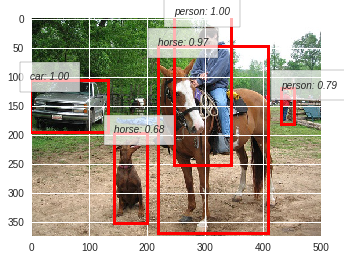

In [59]:
from chainercv.links import SSD300


model = SSD300(
    n_fg_class=len(voc_bbox_label_names),
    pretrained_model='voc0712')

chainer.cuda.get_device_from_id(0).use()
model.to_gpu()

img = utils.read_image('./demo.jpg', color=True)
bboxes, labels, scores = model.predict([img])
bbox, label, score = bboxes[0], labels[0], scores[0]

vis_bbox(img, bbox, label, score, label_names=voc_bbox_label_names)
plt.show()

### SSD512

From: https://chainercv-models.preferred.jp/ssd512_voc0712_converted_2017_06_06.npz
To: /root/.chainer/dataset/_dl_cache/2ba3d4c477638b3b83335a47cdac5eff
  %   Total    Recv       Speed  Time left
100   96MiB   96MiB   1960KiB/s    0:00:00

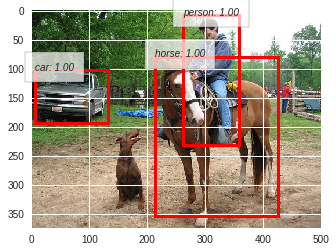

In [60]:
from chainercv.links import SSD512


model = SSD512(
    n_fg_class=len(voc_bbox_label_names),
    pretrained_model='voc0712')

chainer.cuda.get_device_from_id(0).use()
model.to_gpu()

img = utils.read_image('./demo.jpg', color=True)
bboxes, labels, scores = model.predict([img])
bbox, label, score = bboxes[0], labels[0], scores[0]

vis_bbox(img, bbox, label, score, label_names=voc_bbox_label_names)
plt.show()

### YOLO v2

From: https://chainercv-models.preferred.jp/yolo_v2_voc0712_converted_2018_05_03.npz
To: /root/.chainer/dataset/_dl_cache/a8035a18ba140cc348cb620ce0d3ba73
  %   Total    Recv       Speed  Time left
100  179MiB  179MiB   3583KiB/s    0:00:00

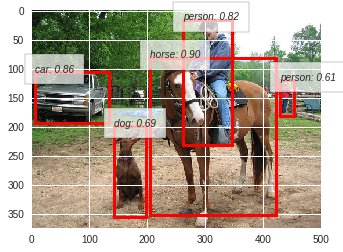

In [61]:
from chainercv.links import YOLOv2


model = YOLOv2(
    n_fg_class=len(voc_bbox_label_names),
    pretrained_model='voc0712')

chainer.cuda.get_device_from_id(0).use()
model.to_gpu()

img = utils.read_image('./demo.jpg', color=True)
bboxes, labels, scores = model.predict([img])
bbox, label, score = bboxes[0], labels[0], scores[0]

vis_bbox(img, bbox, label, score, label_names=voc_bbox_label_names)
plt.show()

### YOLO v3

From: https://chainercv-models.preferred.jp/yolo_v3_voc0712_converted_2018_05_01.npz
To: /root/.chainer/dataset/_dl_cache/79d417010adfc0e1052bb8e5c4851753
  %   Total    Recv       Speed  Time left
100  219MiB  219MiB    874KiB/s    0:00:00

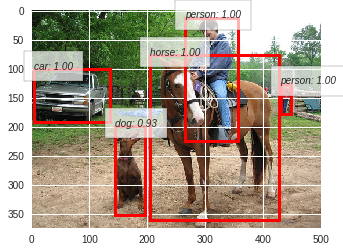

In [65]:
from chainercv.links import YOLOv3


model = YOLOv3(
    n_fg_class=len(voc_bbox_label_names),
    pretrained_model='voc0712')

chainer.cuda.get_device_from_id(0).use()
model.to_gpu()

img = utils.read_image('./demo.jpg', color=True)
bboxes, labels, scores = model.predict([img])
bbox, label, score = bboxes[0], labels[0], scores[0]

vis_bbox(img, bbox, label, score, label_names=voc_bbox_label_names)
plt.show()

## Semantic Segmentation

### Setup

In [0]:
! wget https://raw.githubusercontent.com/alexgkendall/SegNet-Tutorial/master/CamVid/test/0001TP_008550.png -O demo_semantic.png 

In [0]:
from chainercv.datasets import camvid_label_colors
from chainercv.datasets import camvid_label_names
from chainercv.datasets import cityscapes_semantic_segmentation_label_colors
from chainercv.datasets import cityscapes_semantic_segmentation_label_names
from chainercv.visualizations import vis_image
from chainercv.visualizations import vis_semantic_segmentation

### SegNet

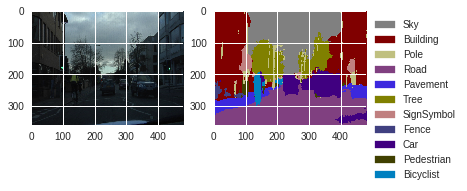

In [76]:
from chainercv.links import SegNetBasic


model = SegNetBasic(
    n_class=len(camvid_label_names),
    pretrained_model='camvid')

chainer.cuda.get_device_from_id(0).use()
model.to_gpu()

img = utils.read_image('./demo_semantic.png', color=True)
labels = model.predict([img])
label = labels[0]

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
vis_image(img, ax=ax1)
ax2 = fig.add_subplot(1, 2, 2)
ax2, legend_handles = vis_semantic_segmentation(
    None, label, camvid_label_names, camvid_label_colors, ax=ax2)
ax2.legend(handles=legend_handles, bbox_to_anchor=(1, 1), loc=2)
plt.show()

### PSPNet

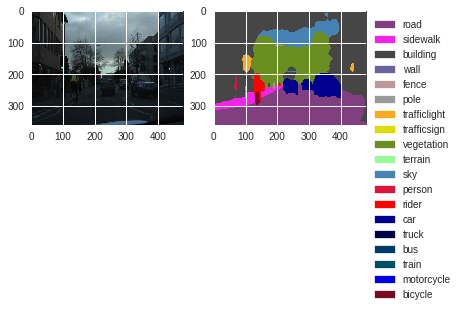

In [80]:
from chainercv.experimental.links import PSPNetResNet101


model = PSPNetResNet101(
    n_class=len(cityscapes_semantic_segmentation_label_names),
    pretrained_model='cityscapes')

chainer.cuda.get_device_from_id(0).use()
model.to_gpu()

img = utils.read_image('./demo_semantic.png', color=True)
labels = model.predict([img])
label = labels[0]

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
vis_image(img, ax=ax1)
ax2 = fig.add_subplot(1, 2, 2)
ax2, legend_handles = vis_semantic_segmentation(
    None, label, cityscapes_semantic_segmentation_label_names,
    cityscapes_semantic_segmentation_label_colors, ax=ax2)
ax2.legend(handles=legend_handles, bbox_to_anchor=(1, 1), loc=2)
plt.show()

## Instance Segmentation

### Setup

In [0]:
! wget https://raw.githubusercontent.com/knorth55/chainer-fcis/master/examples/voc/images/SBD_test2008_000090.jpg -O demo_instance.jpg

In [0]:
from chainercv.datasets import sbd_instance_segmentation_label_names
from chainercv.visualizations.colormap import voc_colormap
from chainercv.visualizations import vis_bbox
from chainercv.visualizations import vis_instance_segmentation

### FCIS

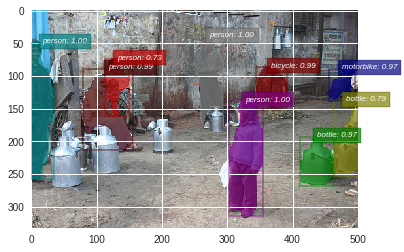

In [87]:
from chainercv.experimental.links import FCISResNet101


model = FCISResNet101(
    n_fg_class=len(sbd_instance_segmentation_label_names),
    pretrained_model='sbd')

chainer.cuda.get_device_from_id(0).use()
model.to_gpu()

img = utils.read_image('./demo_instance.jpg', color=True)

masks, labels, scores = model.predict([img])
mask, label, score = masks[0], labels[0], scores[0]
bbox = utils.mask_to_bbox(mask)
colors = voc_colormap(list(range(1, len(mask) + 1)))
ax = vis_bbox(
    img, bbox, instance_colors=colors, alpha=0.5, linewidth=1.5)
vis_instance_segmentation(
    None, mask, label, score,
    label_names=sbd_instance_segmentation_label_names,
    instance_colors=colors, alpha=0.7, ax=ax)
plt.show()